# Descomposicion de Valores Singulares
## Reconocimiento de Patrones, Tarea 2
## Equipo: Kathia Rangel Pompa, Juan Carlos Perez Ramirez

In [1]:
# libraries
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# functions to load and show images (rgb to grayscale)
def load_image(path):
    im = imread(path)
    X = im.dot([0.299, 0.5870, 0.114]) # to grayscale
    return X

def show_image(X, title):
    plt.figure(figsize=(12, 6))
    plt.imshow(X, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

def show_n_images(images, titles):
    plt.subplots(1, len(titles), figsize=(12, 6))
    for i, (im, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(titles), i+1)
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        plt.title(title)
    plt.show()

def check_error(image1, image2):
    X_Xhat = image1 - image2
    return np.linalg.norm(X_Xhat, ord='fro')

Se carga la imagen original y se crea una segunda imagen con ruido, calculando la diferencia entre las dos a traves de la norma de Frobenius

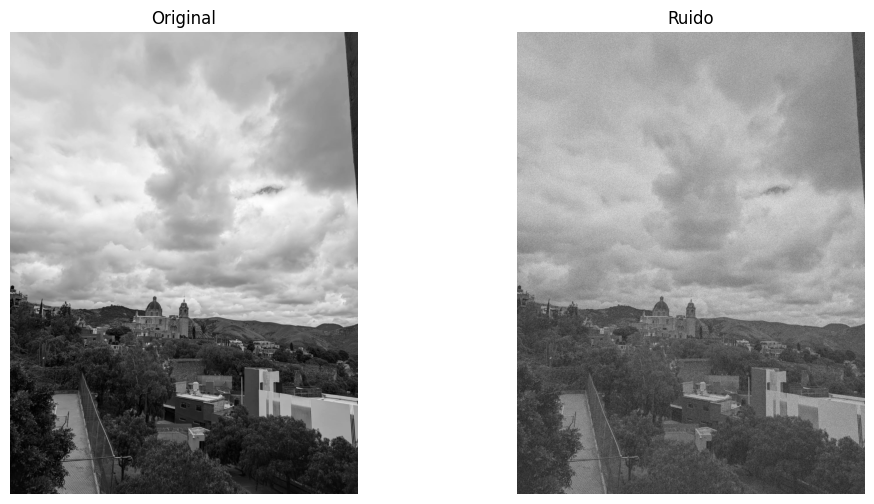

In [2]:
image = load_image("valenciana.jpeg")
noisy_image = image.copy() + np.random.normal(0, 20, image.shape)

# lista con los errores entre las imagenes
frobenius = []
frobenius.append(check_error(image, noisy_image))

images = [image, noisy_image]
titles = ['Original', 'Ruido']

show_n_images(images, titles)

# SVD
Se aplica SVD a la imagen con ruido y se calcula su error

In [3]:
def svd_effect(image, p):
    U, S, V = np.linalg.svd(image, full_matrices=False) # decomposition
    image_p = U[:,:p] @ np.diag(S)[:p,:p] @ V[:p,:]
    return image_p

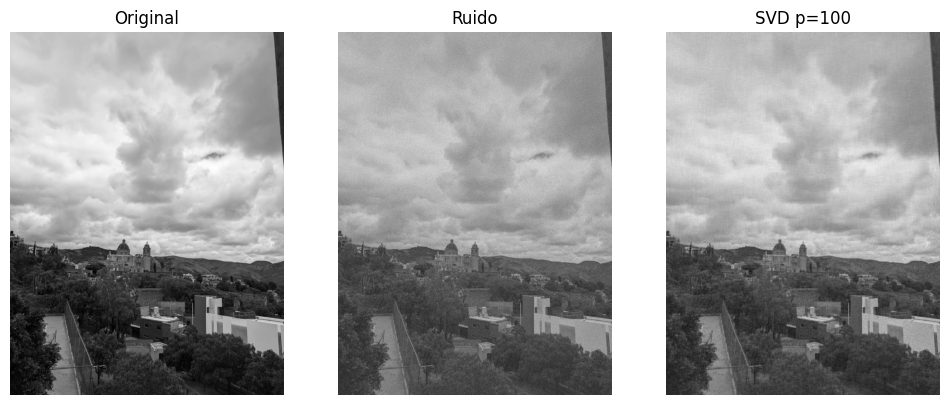

In [4]:
p = 100
image_p = svd_effect(noisy_image, p)
images.append(image_p)
titles.append(f'SVD p={p}')

frobenius.append(check_error(image, image_p))

show_n_images(images, titles)

# PCA

Se repiten los pasos anteriores para la aplicacion del PCA a nivel global y con parches

## Global


In [5]:
from sklearn.decomposition import PCA
p = 100
pca = PCA(n_components=p)
transformed = pca.fit_transform(noisy_image)
image_pca_global = pca.inverse_transform(transformed)

images.append(image_pca_global)
titles.append(f'PCA global p={p}')

frobenius.append(check_error(image, image_pca_global))

## Parches

In [6]:
from sklearn.decomposition import PCA
def patched_pca(image, p, k):
    if p>k:
        raise ValueError('p debe ser menor o igual a k')
    
    image_p = np.zeros(image.shape)
    pca = PCA(n_components=p)
    i = k
    while i<=image.shape[0]:
        j = k
        while j<=image.shape[1]:
            transformed = pca.fit_transform(image[i-k:i, j-k:j])
            image_p[i-k:i, j-k:j] = pca.inverse_transform(transformed)
            j += k
        i += k
    image_p = np.clip(image_p, 0, 255)
    return image_p

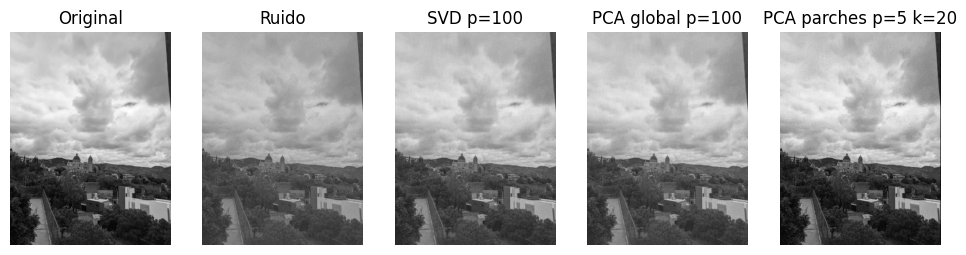

In [7]:
p = 5
k = 20
image_patch = patched_pca(noisy_image, p, k)
images.append(image_patch)
titles.append(f'PCA parches p={p} k={k}')

frobenius.append(check_error(image, image_patch))

show_n_images(images, titles)


# Comparacion de errores

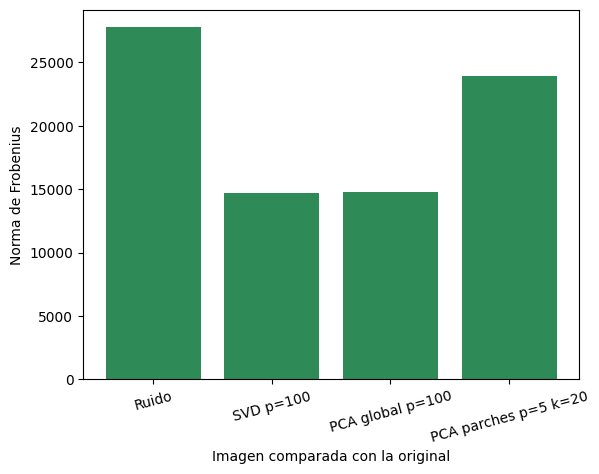

In [8]:
plt.bar(titles[1:],frobenius, color='seagreen')
plt.xticks(rotation=15)
plt.xlabel("Imagen comparada con la original")
plt.ylabel("Norma de Frobenius")
plt.show()